In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("goldstock.csv")

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


In [6]:
df.describe(include='all')

,Date,Close,Volume,Open,High,Low
count,2511,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,2019-01-17 07:28:27.526881792,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
min,2014-01-22 00:00:00,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,2016-07-19 12:00:00,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,2019-01-17 00:00:00,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,2021-07-17 12:00:00,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2024-01-19 00:00:00,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000
std,NaN,298.824811,97600.769382,299.118187,301.262244,296.417703


In [18]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

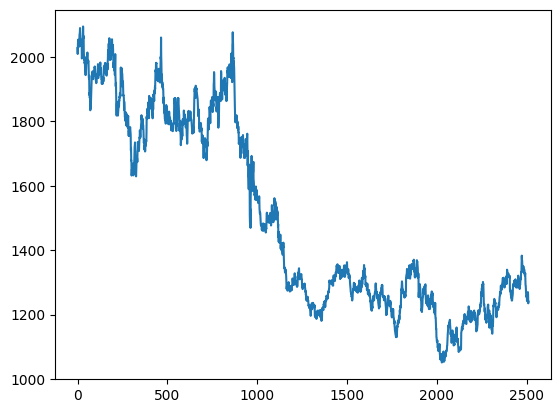

In [7]:
x=df.index
y=df['Open']
# plt(df['Close'],df['Open'])
fig, ax = plt.subplots()
ax.plot(x, y)

/home/aldona/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


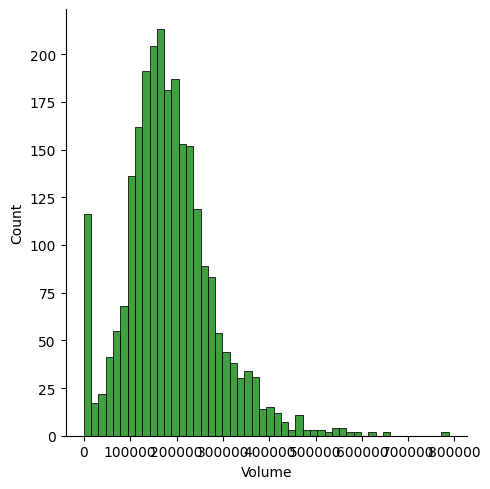

In [22]:
sns.displot(df['Volume'], color='green')

Possible conditions:

- Time Series Analysis: Explore trends and patterns in gold prices over a given period.
- Advanced Modeling: Build models to predict future gold prices based on historical data.
- Trading Strategy Development: Develop and reverse trade strategies using the given price and volume information.
- Market Sentiment Analysis: Analyze the impact of market events on gold prices and assess market sentiment.
- Statistical Analysis: Perform tests and statistical analysis to gain insight into the characteristics of gold price movements.

<Axes: >

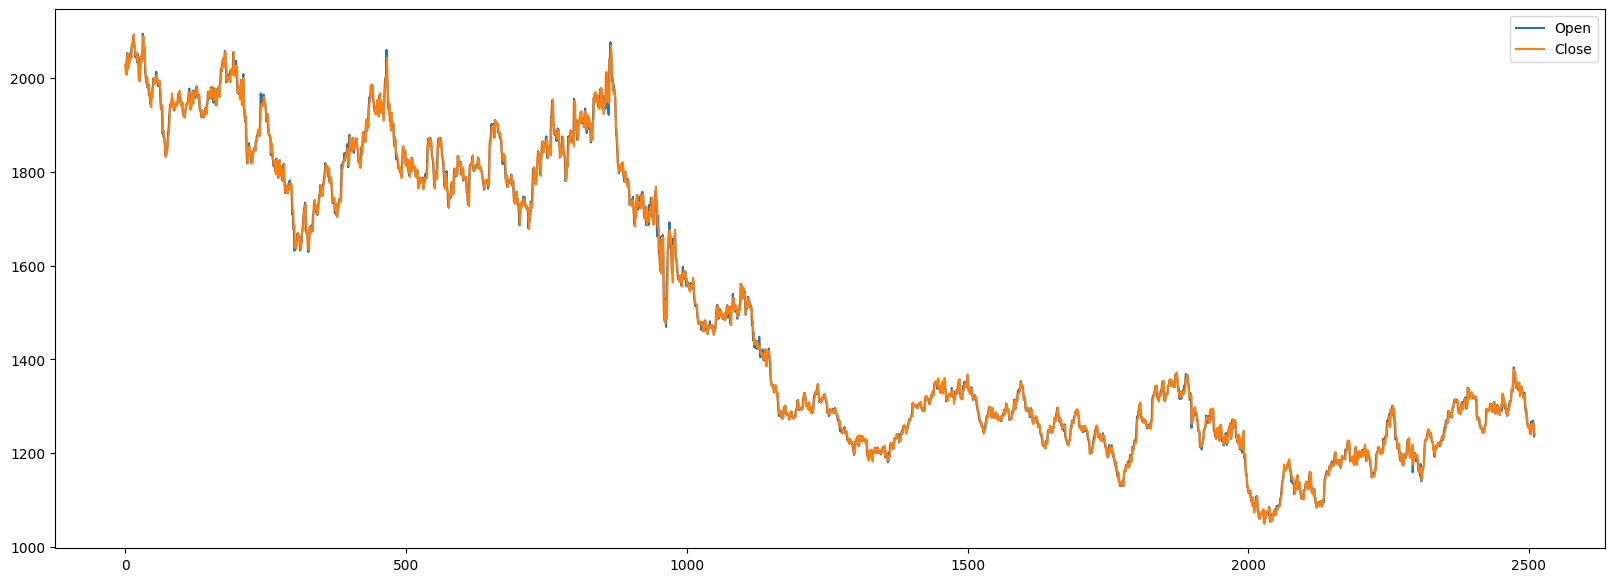

In [8]:
df[['Open','Close']].plot(figsize=(20,7))

<Axes: >

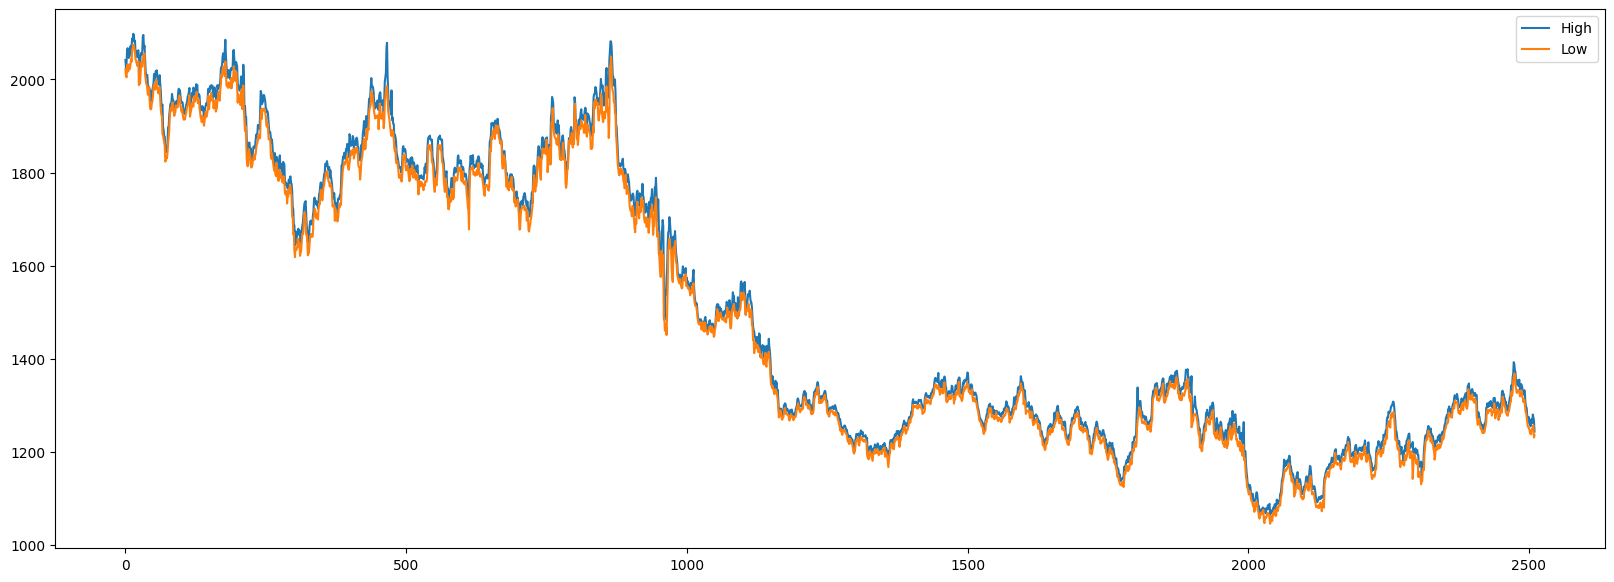

In [9]:
df[['High','Low']].plot(figsize=(20,7))


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df = df.sort_values(by='Date', ascending=True)

In [10]:
df

,Date,Close,Volume,Open,High,Low
2510,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
...,...,...,...,...,...,...
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7


In [62]:
Y_train_scaled

array([[0.7979633 ],
       [0.84974541],
       [0.16485733],
       ...,
       [0.15246421],
       [0.17033337],
       [0.90316073]])

In [23]:
X_train,X_test, y_train, y_test=train_test_split(df.drop(['Date', 'Open'], axis=1),df[["Open"]], random_state=0)

In [24]:
print(X_train.shape)
print(y_train.shape)

(1883, 4)
(1883, 1)


In [25]:
print(X_test.shape)
print(y_test.shape)

(628, 4)
(628, 1)


In [42]:
y_test

,Open
1941,1239.8
1716,1226.2
1133,1417.7
225,1818.0
292,1777.0
...,...
906,1703.9
2052,1083.5
2007,1100.9
1014,1521.0


In [27]:
train_df = df.head(len(df) - 19)
train_df.tail()

,Date,Close,Volume,Open,High,Low
23,2023-12-14,2044.9,222776.0,2043.2,2062.9,2039.1
22,2023-12-15,2035.7,166565.0,2051.3,2059.6,2029.2
21,2023-12-18,2040.5,137436.0,2033.3,2048.0,2029.5
20,2023-12-19,2052.1,130031.0,2041.1,2061.0,2034.8
19,2023-12-20,2047.7,119394.0,2053.8,2056.9,2040.6


In [16]:
test_df = df.tail(19)
test_df.reset_index(drop=True, inplace=True)
test_df.head(19)

,Date,Close,Volume,Open,High,Low
0,2023-12-21,2051.3,115184.0,2044.4,2058.0,2043.3
1,2023-12-22,2069.1,162292.0,2061.2,2083.0,2058.2
2,2023-12-26,2069.8,76492.0,2066.0,2080.5,2065.1
3,2023-12-27,2093.1,124021.0,2079.3,2095.8,2072.8
4,2023-12-28,2083.5,126411.0,2089.5,2098.2,2074.6
5,2023-12-29,2071.8,102741.0,2076.1,2084.1,2067.6
6,2024-01-02,2073.4,149926.0,2072.7,2088.1,2064.3
7,2024-01-03,2042.8,214132.0,2067.9,2074.3,2038.3
8,2024-01-04,2050.0,125573.0,2049.3,2058.1,2043.3
9,2024-01-05,2049.8,208861.0,2051.4,2071.1,2030.8


Create, Compile and Fit the LSTM RNN Model

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

2024-01-30 10:21:58.713922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 10:21:59.164434: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 10:21:59.166687: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 10:22:00.780436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [52]:
train_dataX_train = train_df.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))

# fit the scaler only on X_train
sc.fit(X_train)

# scale X_train values to between 0 and 1
X_train_scaled = sc.transform(X_train)

In [66]:
X_train_scaled.shape

(1883, 4)

In [50]:
train_data = []
train_labels = []

# create the training data using 60 timesteps
for i in range(TIMESTEP, len(X_train_scaled)):
  train_data.append(X_train_scaled[i-TIMESTEP:i, 0])
  train_labels.append(X_train_scaled[i, 0])

# convert train_data and train_labels back into numpy arrays
train_data, train_labels = np.array(train_data), np.array(train_labels)

# reshape train_data to be 3D so its compatible with the RNNs input requirements
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))

In [71]:
regressor = Sequential()

regressor.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))))
regressor.add(Dropout(0.1))

regressor.add(Bidirectional(LSTM(units=60, return_sequences=True)))
regressor.add(Dropout(0.1))

regressor.add(Bidirectional(LSTM(units=80, return_sequences=True)))
regressor.add(Dropout(0.2))

regressor.add(Bidirectional(LSTM(units=120)))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [72]:
regressor.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [73]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min',patience=20)

In [74]:
EPOCHS = 150
BATCH_SIZE = 32
TIMESTEP = 60

In [76]:
history = regressor.fit(train_data,train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/150


KeyboardInterrupt: 

In [57]:
last_60_days_2023 = train_df.iloc[:, 1:2].tail(TIMESTEP)
last_60_days_2023 = pd.concat([last_60_days_2023, test_df.iloc[:, 1:2]])
last_60_days_2023 = sc.transform(last_60_days_2023)

X_test = []
for i in range(TIMESTEP, 79):
  X_test.append(last_60_days_2023[i-TIMESTEP:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/home/aldona/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [58]:
predicted_value = regressor.predict(X_test)
predicted_value = sc.inverse_transform(predicted_value)
predicted_value

1/1 [==============================] - 5s 5s/step


array([[2040.4487],
       [2042.5946],
       [2054.244 ],
       [2057.2402],
       [2071.0537],
       [2065.093 ],
       [2058.5977],
       [2057.202 ],
       [2041.2992],
       [2043.5703],
       [2042.5625],
       [2035.2266],
       [2032.8452],
       [2029.0355],
       [2024.3983],
       [2044.8364],
       [2033.3733],
       [2017.9393],
       [2020.9242]], dtype=float32)

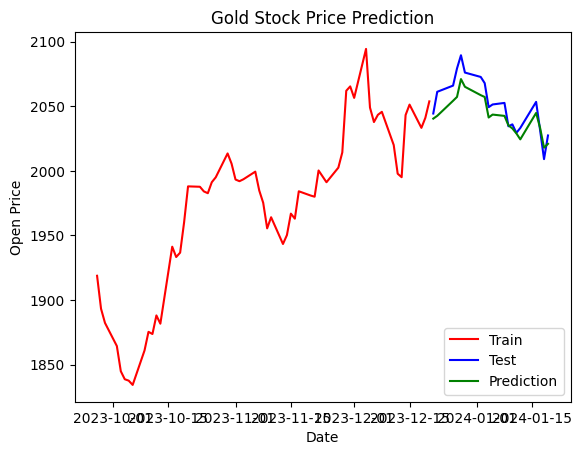

In [59]:
plt.plot(train_df.tail(TIMESTEP)['Date'], train_df.tail(TIMESTEP)['Open'], color='red')
plt.plot(test_df['Date'], test_df['Open'], color='blue')
plt.plot(test_df['Date'], predicted_value, color='green')
plt.title('Gold Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend(['Train', 'Test', 'Prediction'], loc='lower right')

Text(0.5, 0, 'Epoch')

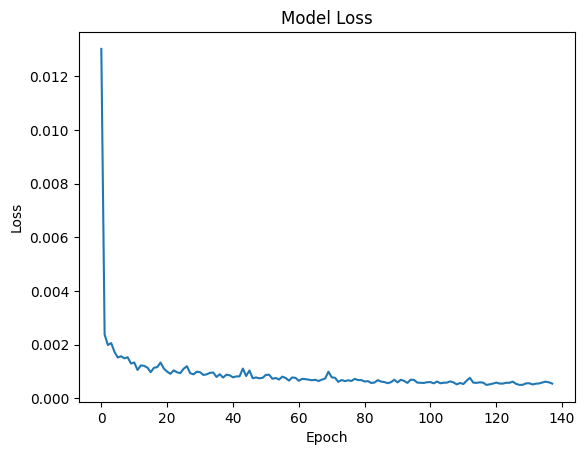

In [60]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

k_Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
num = df.select_dtypes(include=['int','float'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(num)

In [ ]:
scaled_X

array([[ 1.77588867, -0.20385836,  1.76779547,  1.77106428,  1.79961012],
       [ 1.75011593, -0.19427661,  1.70660345,  1.71694782,  1.75068292],
       [ 1.69957459,  0.60691146,  1.78217392,  1.75180812,  1.74022262],
       ...,
       [-0.78398021, -1.54714807, -0.78387818, -0.78104149, -0.78273374],
       [-0.79067443, -1.47849764, -0.8815179 , -0.80129366, -0.8708027 ],
       [-0.87067033, -1.08328886, -0.86346124, -0.87964633, -0.85494354]])

In [ ]:
num

,Close,Volume,Open,High,Low
0,2029.3,166078.0,2027.4,2041.9,2022.2
1,2021.6,167013.0,2009.1,2025.6,2007.7
2,2006.5,245194.0,2031.7,2036.1,2004.6
3,2030.2,277995.0,2053.4,2062.8,2027.6
4,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...
2506,1250.5,81426.0,1254.9,1261.9,1248.0
2507,1263.5,63419.0,1269.9,1280.1,1252.0
2508,1264.5,34998.0,1264.3,1273.2,1256.9
2509,1262.5,41697.0,1235.1,1267.1,1230.8


In [123]:
model = KMeans(n_clusters=3, n_init='auto')
cluster_labels = model.fit_predict(scaled_X)

NameError: name 'KMeans' is not defined

In [ ]:
num['Cluster'] = cluster_labels
num.head()

,Close,Volume,Open,High,Low,Cluster
0,2029.3,166078.0,2027.4,2041.9,2022.2,0
1,2021.6,167013.0,2009.1,2025.6,2007.7,0
2,2006.5,245194.0,2031.7,2036.1,2004.6,0
3,2030.2,277995.0,2053.4,2062.8,2027.6,0
4,2051.6,250946.0,2033.2,2067.3,2033.1,0


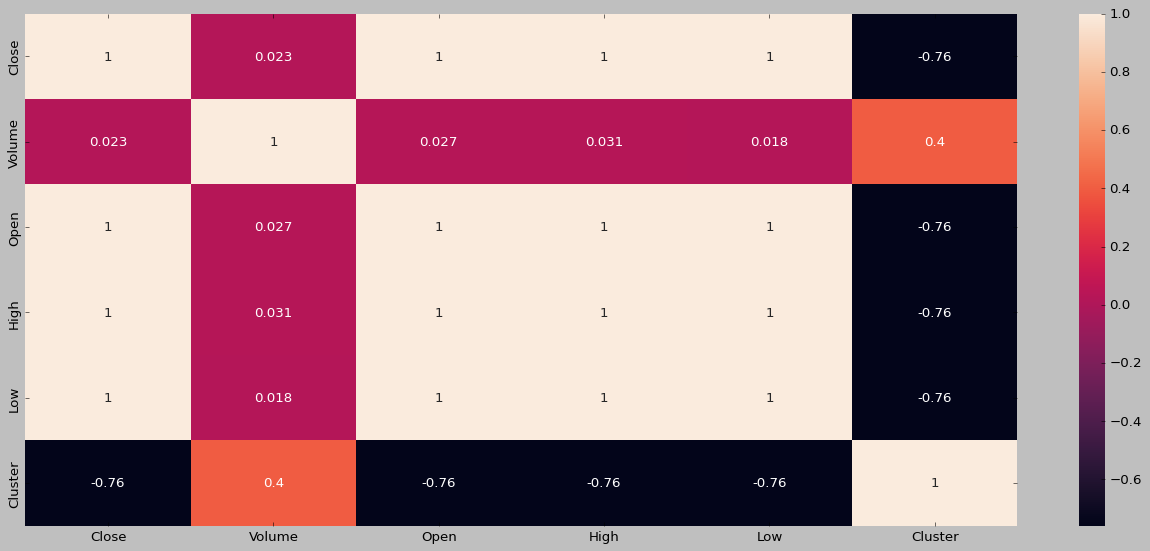

In [ ]:
import seaborn as sns
figure = plt.subplots(figsize=(20,8))
sns.heatmap(num.corr(), annot=True);
plt.show()

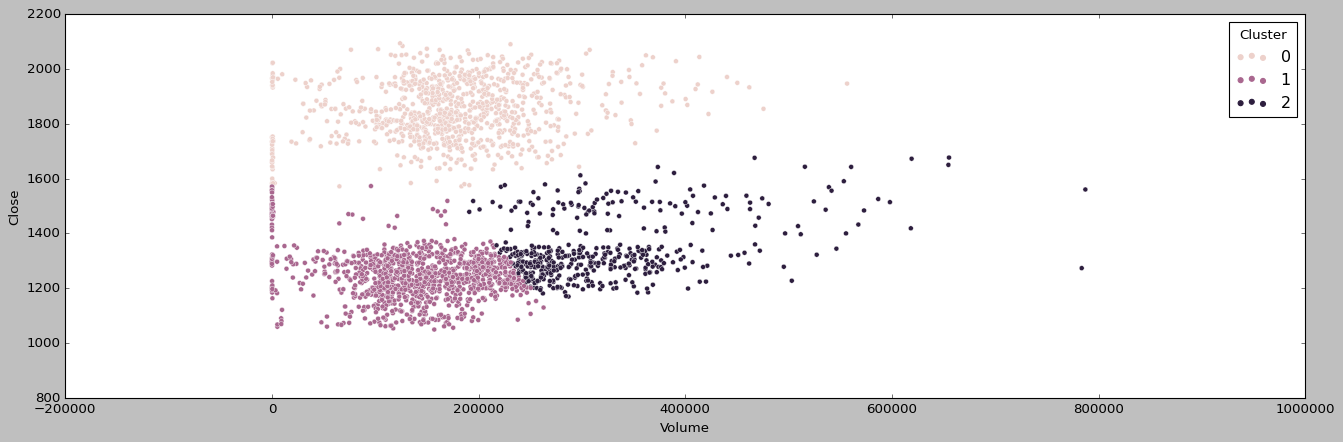

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=num, x=num.Volume, y=num['Close'], hue='Cluster');

In [83]:
X_train_scaled=StandardScaler(X_train)

NameError: name 'StandardScaler' is not defined

In [ ]:
X_train_list.shape

(9415,)

In [ ]:
num = X_train.select_dtypes(include=['int','float'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(num)

In [ ]:
scaled_X

array([[-1.23764682, -0.88410809, -1.22157679, -1.23513777, -1.22596256],
       [-0.71943071, -0.61258754, -0.67184296, -0.69318516, -0.6973593 ],
       [-0.68455078,  1.29292301, -0.62072037, -0.64607317, -0.65850126],
       ...,
       [ 1.31456756, -0.60335017,  1.32658558,  1.3036384 ,  1.33866773],
       [ 1.53713473, -0.12118885,  1.49953928,  1.51218308,  1.54635722],
       [-0.80679663, -0.42076247, -0.80927642, -0.82562586, -0.79148953]])

In [ ]:
knn.fit(scaled_X, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
knn=KNeighborsClassifier(n_neighbors=1)

Model Training: Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [30]:

# training the model
regressor.fit(X_train, y_train)

/home/aldona/.local/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [31]:
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[1239.804 1227.2   1412.599 1821.    1767.68  1968.646 1746.625 1196.234
 1207.841 1282.921 1283.256 1362.745 1783.149 1245.667 1886.069 1806.686
 1214.264 1088.882 1281.398 1850.716 1824.403 1740.439 1345.881 1213.248
 2051.557 1077.741 1303.314 1804.893 1347.704 1838.514 1274.779 1743.278
 1963.396 1071.21  1824.403 1883.58  1919.628 1321.284 1249.436 1144.834
 1326.458 1363.416 1839.906 1290.392 1197.842 1297.502 1289.894 1238.546
 1782.831 1238.43  1270.102 1274.234 2005.9   1940.449 1284.151 1702.495
 1337.779 1349.78  1867.676 1772.402 1258.914 1956.814 1807.029 1651.3
 1277.993 2047.018 2008.105 1298.47  1718.754 1323.7   1324.453 1498.033
 1264.332 1864.328 1851.784 1186.567 1300.515 1271.338 1887.547 1268.01
 1346.504 1179.791 2067.111 1737.95  1134.363 1290.953 1180.526 1860.334
 1227.829 1229.099 1249.747 1911.876 1219.887 1875.84  1353.831 1933.15
 2049.393 1340.073 1306.972 2030.104 1522.826 1329.179 1273.43  1277.18
 1813.741 1323.054 1929.052 1243.143 1930.876 1635.199 1

In [34]:

# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9990501556452748


In [43]:
Y_test = np.array(y_test)

In [44]:
Y_test

array([[1239.8],
       [1226.2],
       [1417.7],
       [1818. ],
       [1777. ],
       [2000.3],
       [1729.8],
       [1202.2],
       [1198.7],
       [1280.7],
       [1287. ],
       [1365.7],
       [1782.5],
       [1238.3],
       [1880.3],
       [1808.4],
       [1203.9],
       [1089.1],
       [1279.1],
       [1875.4],
       [1826.9],
       [1746.4],
       [1339.5],
       [1209. ],
       [2033.2],
       [1085.4],
       [1296.8],
       [1808.5],
       [1348.9],
       [1837.6],
       [1278.4],
       [1746.6],
       [1957.8],
       [1068.6],
       [1826.9],
       [1893.3],
       [1911.1],
       [1331.7],
       [1248.3],
       [1130. ],
       [1324.3],
       [1370.5],
       [1832.4],
       [1296.4],
       [1201.6],
       [1298.8],
       [1289.2],
       [1240.8],
       [1774.6],
       [1235.2],
       [1269.8],
       [1273.5],
       [1984.6],
       [1944.9],
       [1287.7],
       [1720.8],
       [1339.5],
       [1351.1],
       [1875.4

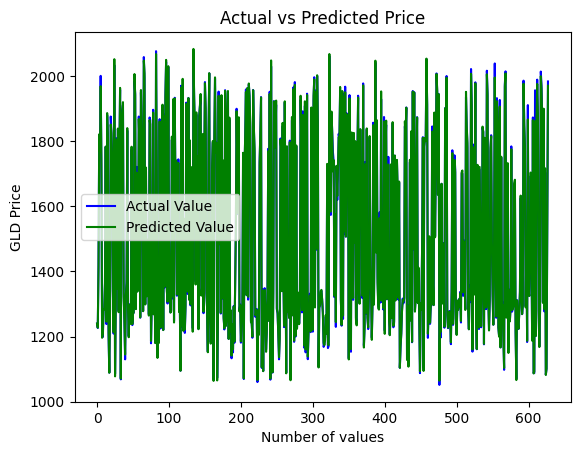

In [45]:

plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
     

Prediction on my own